<h1 align = 'center'> Learning To See </h1>

<h2 align = 'center'> Part 6: It's Definitely Time to Play with Legos </h2>

### Import finger dataset

This dataset has been preprocessed. See Data Preprocessing notebook for more details. 

In [1]:
%pylab inline
from supportFunctions import *
import cPickle as pickle

pickleFileName = 'data/fingerDataSet' + '.pickle'
pickleFile = open(pickleFileName, 'rb')
data = pickle.load(pickleFile)
pickleFile.close()

Populating the interactive namespace from numpy and matplotlib


Extract examples for larger (30 image) training set:

In [2]:
trainingExampleIndices = range(30)
trainingExamples = [data[index] for index in trainingExampleIndices]
trainX, trainY = extractExamplesFromList(trainingExamples, whichImage = 'image1bit', dist = 4)

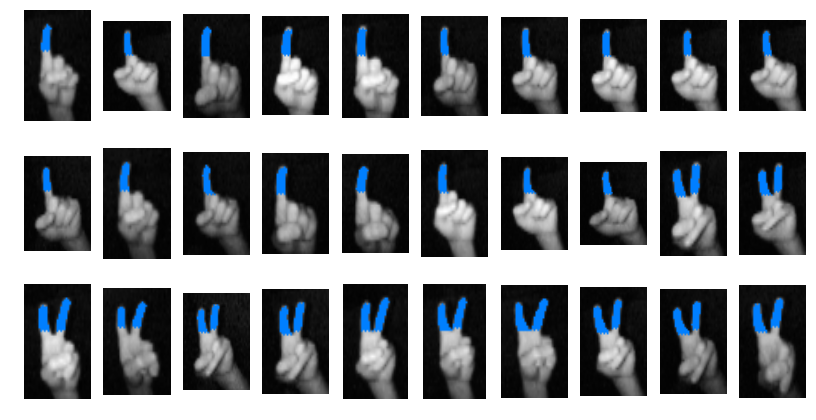

In [3]:
fig = figure(0, (14, 7))

for i in range(30):
    fig.add_subplot(3,10,i+1)
    imageDict = data[trainingExampleIndices[i]]
    
    X1, y1 = extractFeatures(imageDict, whichImage = 'image1bit', dist = 4)
    im = makeGrayScale(imageDict)
    
    yImage = y1.reshape(imageDict['boxHeight'], imageDict['boxWidth'])
    
    #Paint with matches:
    im[:,:,0][yImage==1] = 0
    im[:,:,1][yImage==1] = .5
    im[:,:,2][yImage==1] = 1
    
    imshow(im)
    axis('off')

how many total examples do we have?

In [4]:
trainX.shape

(75935, 81)

In [5]:
#How many unique examples do we have?
uniqueExamples, uniqueIndices, uniqueCounts = findUniqueRowsAndCount(trainX)
uniqueExamples.shape

(19584, 81)

### Now, what percent of all possible examples have we seen?

In [6]:
uniqueExamples.shape[0]/(2**81.)*100

8.099752558119247e-19

## we've seen $ \frac{19584}{2^{81}} = 0.000000000000000000801$ % of all possible examples. Sweet.

- I think this is a common misconception about ML, I hear people talking about thing like "how can ML do well on cases it hasn't seen?" - which is funny, becuase that's the whole point!